# 정적 웹페이지 수집하기
* 순수 HTML, CSS로 만들어진 페이지
* javascript로 내용을 갱신하지 않는 페이지

# 네이버 책 수집하기

#### time.sleep(5) : 5초 정도는 꼭 주기!!!

In [54]:
import time
import requests
import pandas as  pd
from bs4 import BeautifulSoup as bs

In [4]:
url = 'https://search.shopping.naver.com/book/search?'
payload = dict(bookTabType='ALL', pageIndex=1, pageSize=40, prevQuery='%EB%84%A4%EC%9D%B4%EB%B2%84%20%EB%8F%84%EC%84%9C', query='%ED%8C%8C%EC%9D%B4%EC%8D%AC', sort='REL')

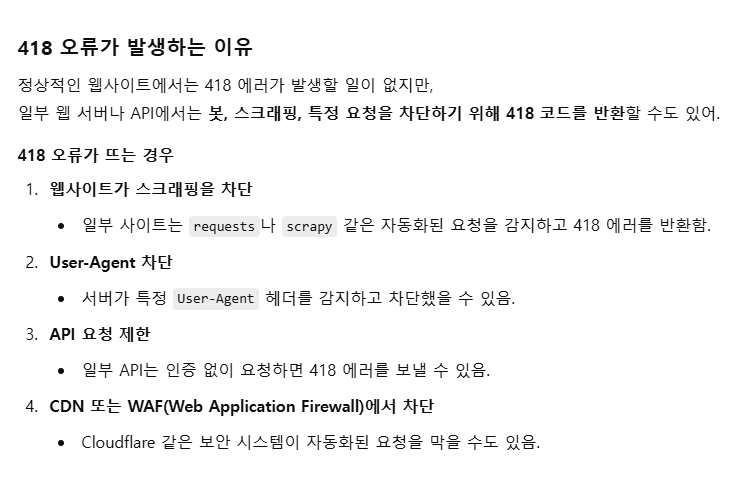

### 개발자도구(F12) → network → ctrl+r

In [10]:
headers = {'user-agent' : 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Mobile Safari/537.36',
          'cookie':'NNB=PZ6N7YDE766GO; ASID=dc487ad50000019564f900f30000001b; NAC=YnefGAC8e4KtH; tooltipDisplayed=true; SHP_BUCKET_ID=0; nid_inf=1932717539; NID_AUT=ORWNK41B9YCSIP64aahOHtu7SIPDjr3pWY0oY40g3MlEVvl8ivoiHJ19zeiEh7zR; NID_JKL=0kywlo0XbO+RHJQn4Q9/qjsN0tDmqN4iQdHeWjOAwGY=; NID_SES=AAABorGTW7eFaMM9cVcrMkgABbXMQGtAi87S22pSQ8uD6Vgh7oSQ4iNHHG6cjmvsCljtYXpYrR+HGDDRZf4FHTclbkwCSBmuSRo3cwMg66hhtO9bbG0zi+1N6SQr9Ya12/TLtJtYsndRSYDPjU4CcfceP0vpgPrBReNCFPHpRB1lYNb8GB+Xt4H2jKpWvX6ubkqGZsqTyCgIjxmO14Mbz7lerSPydizwE3fx1pYdh9HXTzd2RUMh1SedLWFCT4ZKp1TceejLLxfX054kLwUJ0XxyMqjPgiJ0Wki4h76ujII4wQYFV4a44oV8C6IGlaUfNXs2a23pxLAvWQfS8/VzyWtiZCS9hCa4n9ok5IEa4ZhLNDvUpzCWCCfWI7dKcynKeuXWM47JBQ3vTbmKTV/3FbpVdgVsCyIQ+w7eaYS7OF3BvyUI52UXmi5Psm3lsmBAgkMzL2tWJm1+mSP/5warolo8j9TOqGNHWx7GJw/w5FsbLnXsRbwjnZs93ZTekPo8B1nBWqwK6A2m1OlJGjSEmbfZ7zh3S9gYSfmFtxEX3pZjnIvSp2/q42AwjOiyrdcFlwGqtQ==; SRT30=1743646074; NACT=1; page_uid=i+3WCwqX5mNssOIMXaossssst2C-332954; BUC=10YUV897edte-aQzQvgh0gPdoAMceQZ8An9_4yQxN8s=; sus_val=p7g9tzPqfkOMOjUr3FwmXx0H'}

In [11]:
r = requests.get(url, headers=headers, params=payload)
print(r.url)
print(r.status_code)

https://search.shopping.naver.com/book/search?bookTabType=ALL&pageIndex=1&pageSize=40&prevQuery=%25EB%2584%25A4%25EC%259D%25B4%25EB%25B2%2584%2520%25EB%258F%2584%25EC%2584%259C&query=%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC&sort=REL
418


In [9]:
r = r.content
response = bs(r, 'lxml')
response

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<style>
    * {
      margin: 0;
      padding: 0;
    }
    html, body {
      height: 100%;
    }
    body {
      display: flex;
      align-items: center;
      justify-content: center;
      background: #fff;
      font-family: -apple-system, BlinkMacSystemFont, HelveticaNeue,
      AppleSDGothicNeo, sans-serif;
    }
    a {
      text-decoration: none;
      color: #00c73c;
    }
    .content_error {
      line-height: 19px;
      max-width: 578px;
      padding: 64px 40px;
      letter-spacing: -0.5px;
      text-align: center;
      word-break: keep-all;
    }
    .content_error:before {
      display: block;
      width: 64px;
      height: 64px;
      margin: 0 auto;
      background: url(https://ssl.pstatic.net/shoppingsearch/static/icons/img_error.png) no-repeat 0 0;
      -webkit-bac

### 네이버는 막힌 듯!!ㅠㅠ

# yes24 베스트셀러 자료 수집하기

In [134]:
url = 'https://www.yes24.com/product/category/bestseller?'
payload = dict(categoryNumber='001',pageNumber=9,pageSize=120)

In [135]:
r =requests.get(url, params=payload)
print(r.url)
print(r.status_code)

https://www.yes24.com/product/category/bestseller?categoryNumber=001&pageNumber=9&pageSize=120
200


In [138]:
soup = bs(r.content, 'lxml')
check = soup.select('ul#yesBestList > li')
len(check)

39

In [15]:
soup.select_one('a.gd_name')

<a class="gd_name" href="/product/goods/144021119" onclick="wiseLogV2('BS', '001_005_001', ''); ">단 한 번의 삶</a>

In [59]:
title = [title.text for title in soup.select('#yesBestList a.gd_name')]
author = [author.text for author in soup.select('#yesBestList .authPub.info_auth > a:nth-child(1)')]
publisher = [pub.text for pub in soup.select('#yesBestList .authPub.info_pub > a')]
pub_date = [date.text for date in soup.select('#yesBestList .authPub.info_date')]
price = [price.text for price in soup.select('#yesBestList .info_row.info_price strong')]
yes24_best = dict(title=title, author=author, publisher=publisher, pub_date=pub_date, price = price)

In [60]:
for item in yes24_best.values():
    print(len(item))

24
24
24
24
24


In [61]:
yes24_df = pd.DataFrame(yes24_best)
yes24_df

,title,author,publisher,pub_date,price
0,단 한 번의 삶,김영하,복복서가,2025년 04월,"15,120원"
1,듀얼 브레인,이선 몰릭,상상스퀘어,2025년 03월,"18,900원"
2,어른의 품격을 채우는 100일 필사 노트,김종원,청림Life,2025년 03월,"18,000원"
3,소년이 온다,한강,창비,2014년 05월,"13,500원"
4,성적 초격차를 만드는 독서력 수업,김수미,빅피시,2025년 03월,"17,820원"
5,어른의 행복은 조용하다,태수,페이지2북스,2024년 11월,"16,020원"
6,내면소통 명상수업,김주환,인플루엔셜,2025년 03월,"25,200원"
7,모순,양귀자,쓰다,2013년 04월,"11,700원"
8,별별 직업 상담소,요시타케 신스케,주니어김영사,2025년 03월,"14,220원"
9,초역 부처의 말,코이케 류노스케,포레스트북스,2024년 05월,"16,020원"


In [63]:
score = [score.text for score in soup.select('#yesBestList .rating_grade em.yes_b') ]
len(score)

22

In [51]:
score_unit = [unit.text for unit in soup.select('#yesBestList .rating_rvCount a .txC_blue')]
len(score_unit)

22

In [80]:
score2 = []
score_unit2 = []
for i in range(1,25):
    num_score = soup.select_one(f'#yesBestList > li:nth-child({i}) > div > div.item_info > div.info_row.info_rating > span.rating_grade > em')
    num_unit = soup.select_one(f'#yesBestList > li:nth-child({i}) > div > div.item_info > div.info_row.info_rating > span.rating_rvCount > a > em.txC_blue')
    score2.append(num_score.text) if num_score else score2.append(None)
    score_unit2.append(num_unit.text) if num_unit else score_unit2.append(None)

In [82]:
yes24_best.setdefault('score',score2)
yes24_best.setdefault('score_unit',score_unit2)

yes24_df = pd.DataFrame(yes24_best)
yes24_df

,title,author,publisher,pub_date,price,score,score_unit
0,단 한 번의 삶,김영하,복복서가,2025년 04월,"15,120원",9.0,8
1,듀얼 브레인,이선 몰릭,상상스퀘어,2025년 03월,"18,900원",8.7,37
2,어른의 품격을 채우는 100일 필사 노트,김종원,청림Life,2025년 03월,"18,000원",9.9,56
3,소년이 온다,한강,창비,2014년 05월,"13,500원",9.7,"3,845"
4,성적 초격차를 만드는 독서력 수업,김수미,빅피시,2025년 03월,"17,820원",9.9,67
5,어른의 행복은 조용하다,태수,페이지2북스,2024년 11월,"16,020원",9.5,188
6,내면소통 명상수업,김주환,인플루엔셜,2025년 03월,"25,200원",10.0,10
7,모순,양귀자,쓰다,2013년 04월,"11,700원",9.6,"1,389"
8,별별 직업 상담소,요시타케 신스케,주니어김영사,2025년 03월,"14,220원",10.0,2
9,초역 부처의 말,코이케 류노스케,포레스트북스,2024년 05월,"16,020원",9.4,348


## 수업 답안

In [140]:
book_list= soup.select('ul#yesBestList > li')

In [141]:
print(len(book_list))

39


In [155]:
author = book_list[0].select_one('.authPub.info_auth').text.strip().split('/')
author

['홍민정 글', '김재희 그림']

In [116]:
book_list[0].select_one('.gd_name')['href']

'/product/goods/144021119'

In [104]:
result = {}
keys = ['book_title', 'author', 'publisher', 'date_pub', 'price', 'rating', 'n_reviews']

for book in book_list:
    book_title = book.select_one('.gd_name').text
    
    authors = book.select_one('.info_row.info_pubGrp a:nth-child(1)').text
    
    publisher = book.select_one('.authPub.info_pub > a').text
    date_pub = book.select_one('.authPub.info_date').text
    price = book.select_one('.info_row.info_price strong').text
    rating = book.select_one('.rating_grade em.yes_b').text if book.select_one('.rating_grade em.yes_b') else None
    n_reviews = book.select_one('.rating_rvCount a .txC_blue').text if book.select_one('.rating_rvCount a .txC_blue') else None
    
    values = [book_title, author, publisher, date_pub, price, rating, n_reviews]
    for key, val in zip(keys, values):
        result.setdefault(key,[]).append(val)

In [105]:
result_df = pd.DataFrame(result)
result_df

,book_title,author,publisher,date_pub,price,rating,n_reviews
0,단 한 번의 삶,김영하,복복서가,2025년 04월,"15,120원",9.0,8
1,듀얼 브레인,이선 몰릭,상상스퀘어,2025년 03월,"18,900원",8.7,37
2,어른의 품격을 채우는 100일 필사 노트,김종원,청림Life,2025년 03월,"18,000원",9.9,56
3,소년이 온다,한강,창비,2014년 05월,"13,500원",9.7,"3,845"
4,성적 초격차를 만드는 독서력 수업,김수미,빅피시,2025년 03월,"17,820원",9.9,67
5,어른의 행복은 조용하다,태수,페이지2북스,2024년 11월,"16,020원",9.5,188
6,내면소통 명상수업,김주환,인플루엔셜,2025년 03월,"25,200원",10.0,10
7,모순,양귀자,쓰다,2013년 04월,"11,700원",9.6,"1,389"
8,별별 직업 상담소,요시타케 신스케,주니어김영사,2025년 03월,"14,220원",10.0,2
9,초역 부처의 말,코이케 류노스케,포레스트북스,2024년 05월,"16,020원",9.4,348


In [157]:
page = 0
result_all = {}
keys = ['book_title', 'author1', 'author2', 'author3', 'publisher', 'date_pub', 'price', 'rating', 'n_reviews']
while True:
    page += 1
    payload = dict(categoryNumber='001',pageNumber=page,pageSize=120)
    req = requests.get(url, params=payload)
    soup = bs(req.text, 'lxml')
    book_list = soup.select('ul#yesBestList > li')
    print(page, ':', len(book_list), end='\r')
    
    if not book_list:
        break
        
    for book in book_list:
        book_title = book.select_one('.gd_name').text
        
        authors = book.select_one('.authPub.info_auth').text.strip().split('/')
        a1 = authors[0] if len(authors) > 0 else '-'
        a2 = authors[1] if len(authors) > 1 else '-'
        a3 = authors[2] if len(authors) > 2 else '-'
        
        publisher = book.select_one('.authPub.info_pub > a').text
        date_pub = book.select_one('.authPub.info_date').text
        price = book.select_one('.info_row.info_price strong').text
        rating = book.select_one('.rating_grade em.yes_b').text if book.select_one('.rating_grade em.yes_b') else None
        n_reviews = book.select_one('.rating_rvCount a .txC_blue').text if book.select_one('.rating_rvCount a .txC_blue') else None

        values = [book_title, a1, a2, a3, publisher, date_pub, price, rating, n_reviews]
        for key, val in zip(keys, values):
            result_all.setdefault(key,[]).append(val)
    time.sleep(5)
    

In [158]:
result_all_df = pd.DataFrame(result_all)
result_all_df

,book_title,author1,author2,author3,publisher,date_pub,price,rating,n_reviews
0,단 한 번의 삶,김영하 저,-,-,복복서가,2025년 04월,"15,120원",8.9,9
1,듀얼 브레인,이선 몰릭 저,신동숙 역,-,상상스퀘어,2025년 03월,"18,900원",8.7,38
2,어른의 품격을 채우는 100일 필사 노트,김종원 저,-,-,청림Life,2025년 03월,"18,000원",9.9,56
3,소년이 온다,한강 저,-,-,창비,2014년 05월,"13,500원",9.7,"3,845"
4,성적 초격차를 만드는 독서력 수업,김수미 저,-,-,빅피시,2025년 03월,"17,820원",9.9,67
...,...,...,...,...,...,...,...,...,...
994,오십의 기술,이호선 저,-,-,카시오페아,2023년 04월,"16,200원",9.2,48
995,햇빛초 대나무 숲에 새 글이 올라왔습니다,황지영 글,백두리 그림,-,우리학교,2020년 08월,"13,050원",9.9,68
996,처음 읽는 그리스 로마 신화 2,최설희 글,한현동 그림,정수영 편,미래엔아이세움,2020년 08월,"10,800원",9.9,84
997,"칵테일, 러브, 좀비",조예은 저,-,-,안전가옥,2020년 04월,"11,700원",9.2,"1,132"
